In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("movies.csv")

In [3]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
data.shape

(9742, 3)

In [6]:
data_1=pd.read_csv("ratings.csv")

In [8]:
data_1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
data_1.shape

(100836, 4)

In [11]:
data_1['userId'].nunique()


610

In [12]:
data_1.groupby('movieId').size().reset_index(name='rating')

,movieId,rating
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [15]:
data_1.iloc

In [18]:
data_1.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [23]:
selected_movies = ["Matrix", "Pulp Fiction", "Forrest Gump", "Shawshank Redemption"]

In [26]:
selected_movies_data = data[data['title'].isin(selected_movies)]

In [27]:
df = pd.merge(data_1, data, on='movieId')

In [28]:
count = df['title'].value_counts()

In [29]:
rated_movie = count.idxmax()
ratings_count = count.max()

In [30]:
print(f"Movie with maximum ratings: {rated_movie}")
print(f"ratings: {ratings_count}")

Movie with maximum ratings: Forrest Gump (1994)
ratings: 329


In [31]:
data_2 =pd.read_csv("tags.csv")

In [33]:
data_2.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [34]:
id = data[data['title'] == "Matrix, The (1999)"]['movieId'].values[0]

In [35]:
tags = data_2[data_2['movieId'] == id]['tag']

In [42]:
print(f"Tags for 'Matrix, The (1999)':{tags.tolist()}")

Tags for 'Matrix, The (1999)':['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


In [43]:
id = data[data['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]

In [47]:
rating = data_1[data_1['movieId'] == id]

In [48]:
average_rating = rating['rating'].mean()

In [49]:
print(f"Average rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")

Average rating for 'Terminator 2: Judgment Day (1991)': 3.97


In [50]:
id = data[data['title'] == "Fight Club (1999)"]['movieId'].values[0]

In [52]:
ratings = data_1[data_1['movieId'] == id]['rating']

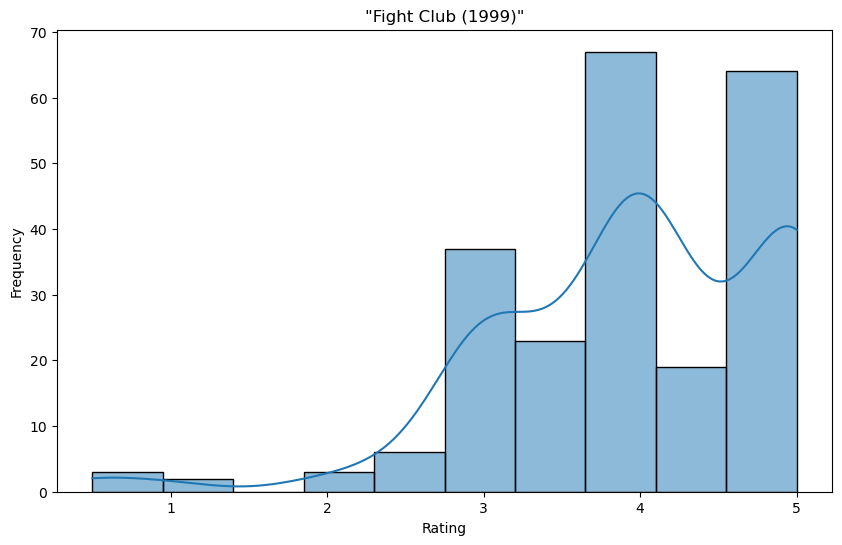

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings, bins=10, kde=True)
plt.title('"Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [55]:
rating = data_1.groupby('movieId').agg(ratings_count=('rating', 'count'),average_rating=('rating', 'mean')).reset_index()

In [75]:
merged_df = pd.merge(rating, data, on='movieId')

In [76]:
filtered = merged_df[merged_df['rating'] > 50]

In [77]:
print(filtered)

Empty DataFrame
Columns: [userId, movieId, rating, timestamp, title, genres]
Index: []


In [78]:
popular = filtered.loc[filtered['rating'].idxmax()]
print(f"Most popular movie : {popular['title']}")

ValueError: attempt to get argmax of an empty sequence

In [79]:
top_5_movies = merged_df.sort_values(by='rating', ascending=False).head(5)

In [80]:
top_5_titles = top_5_movies['title'].tolist()

In [81]:
options = ["Pulp Fiction (1994)","Bad Boys (1995)","Silence of the Lambs, The (1991)","Matrix, The (1999)"]

In [82]:
selected_options = [option for option in options if option in top_5_titles]
print(selected_options)

[]


In [84]:
ratings = ratings.sort_values(by='ratings_count', ascending=False)
third_most_popular = sratings.iloc[2]

TypeError: sort_values() got an unexpected keyword argument 'by'

In [ ]:
merged_df = pd.merge(data, links_df, on='movieId')